In [195]:
import pandas as pd
salary=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset3/main/Salaries.csv')

In [196]:
salary.head()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500


In [197]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   rank           397 non-null    object
 1   discipline     397 non-null    object
 2   yrs.since.phd  397 non-null    int64 
 3   yrs.service    397 non-null    int64 
 4   sex            397 non-null    object
 5   salary         397 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 18.7+ KB


In [198]:
salary.columns

Index(['rank', 'discipline', 'yrs.since.phd', 'yrs.service', 'sex', 'salary'], dtype='object')

In [199]:
salary.shape

(397, 6)

In [200]:
#dropping column
salary.drop(['discipline','sex'],axis=1,inplace=True)
salary.head()

,rank,yrs.since.phd,yrs.service,salary
0,Prof,19,18,139750
1,Prof,20,16,173200
2,AsstProf,4,3,79750
3,Prof,45,39,115000
4,Prof,40,41,141500


In [201]:
df=salary.drop_duplicates()
df

,rank,yrs.since.phd,yrs.service,salary
0,Prof,19,18,139750
1,Prof,20,16,173200
2,AsstProf,4,3,79750
3,Prof,45,39,115000
4,Prof,40,41,141500
...,...,...,...,...
392,Prof,33,30,103106
393,Prof,31,19,150564
394,Prof,42,25,101738
395,Prof,25,15,95329


In [202]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 391 entries, 0 to 396
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   rank           391 non-null    object
 1   yrs.since.phd  391 non-null    int64 
 2   yrs.service    391 non-null    int64 
 3   salary         391 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 15.3+ KB


In [203]:
df.describe()

,yrs.since.phd,yrs.service,salary
count,391.000000,391.000000,391.000000
mean,22.601023,17.838875,114123.010230
std,12.774751,12.976986,30317.357993
min,1.000000,0.000000,57800.000000
25%,12.000000,7.000000,91163.500000
50%,21.000000,17.000000,107550.000000
75%,32.000000,27.000000,134620.000000
max,56.000000,60.000000,231545.000000


EDA

In [204]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

<AxesSubplot:xlabel='rank', ylabel='salary'>

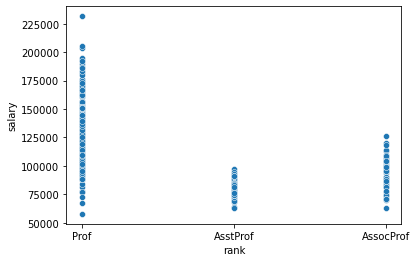

In [205]:
sns.scatterplot(x='rank',y='salary',data=df)

<AxesSubplot:xlabel='yrs.since.phd', ylabel='salary'>

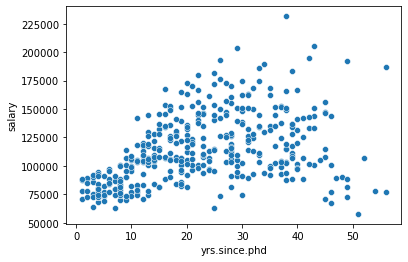

In [206]:
sns.scatterplot(x='yrs.since.phd',y='salary',data=df)

<AxesSubplot:xlabel='yrs.service', ylabel='salary'>

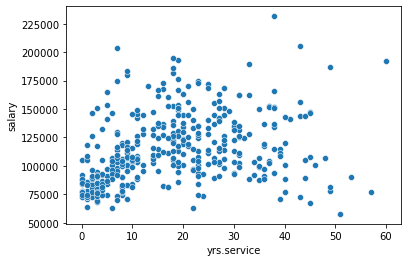

In [207]:
sns.scatterplot(x='yrs.service',y='salary',data=df)

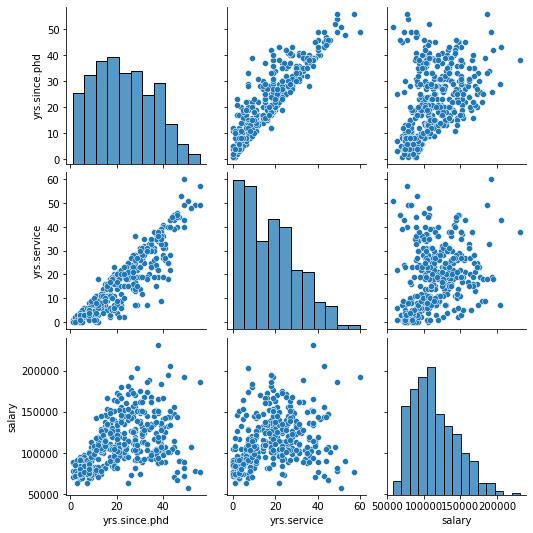

In [208]:
sns.pairplot(df)

In [209]:
#encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['rank']=le.fit_transform(df['rank'])
df['rank'].value_counts()

2    266
0     64
1     61
Name: rank, dtype: int64

In [210]:
df

,rank,yrs.since.phd,yrs.service,salary
0,2,19,18,139750
1,2,20,16,173200
2,1,4,3,79750
3,2,45,39,115000
4,2,40,41,141500
...,...,...,...,...
392,2,33,30,103106
393,2,31,19,150564
394,2,42,25,101738
395,2,25,15,95329


In [211]:
#correlation
df.corr()

,rank,yrs.since.phd,yrs.service,salary
rank,1.000000,0.520790,0.441746,0.518195
yrs.since.phd,0.520790,1.000000,0.908134,0.408533
yrs.service,0.441746,0.908134,1.000000,0.324250
salary,0.518195,0.408533,0.324250,1.000000


In [212]:
df.corr()['salary'].sort_values()

yrs.service      0.324250
yrs.since.phd    0.408533
rank             0.518195
salary           1.000000
Name: salary, dtype: float64

In [213]:
df.head()

,rank,yrs.since.phd,yrs.service,salary
0,2,19,18,139750
1,2,20,16,173200
2,1,4,3,79750
3,2,45,39,115000
4,2,40,41,141500


<AxesSubplot:>

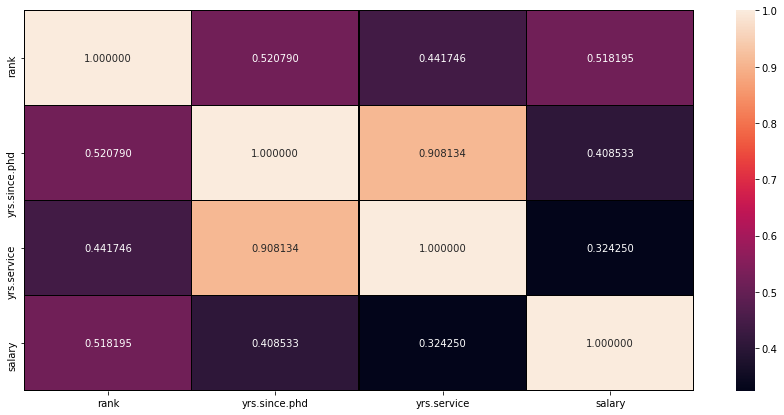

In [214]:
#size of the canvas
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True,linewidths=0.5,linecolor='black',fmt='2f')

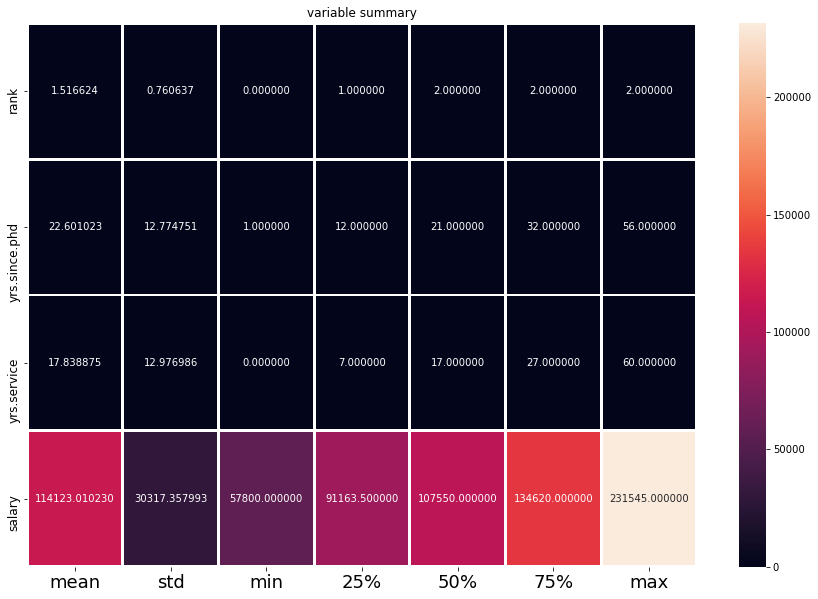

In [215]:
plt.figure(figsize=(15,10))
sns.heatmap(df.describe()[1:].transpose(),linewidth=2,annot=True,fmt='f')
plt.xticks(fontsize=18)
plt.yticks(fontsize=12)
plt.title('variable summary')
plt.show()

In [216]:
#importing sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error

In [217]:
#prepare data
x=df.drop('salary',axis=1)
y=df['salary']

x.shape  , y.shape

((391, 3), (391,))

In [218]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=101,test_size=0.2)
x_train.shape,x_test.shape,y_train.shape,y_train.shape

((312, 3), (79, 3), (312,), (312,))

Define LinearRegression Model

In [219]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

Test Model

In [220]:
pred=lr.predict(x_test)
pred

array([ 82291.19121973,  86418.55153197, 118189.89806436, 124617.14006159,
       117482.28010862,  97322.05222566, 124087.0432391 , 127447.11856908,
        99857.64212408, 101685.61406677, 136529.28451778, 132931.52771259,
       133344.75705926,  98619.43403041, 126857.35472006, 131988.20154343,
       126091.05636869,  99267.87827506,  82880.95506875,  97616.93415017,
        83824.28123791, 125560.46623075,  87067.48909207, 119428.10615803,
       120371.92564264, 124145.72363473, 125265.58430624, 120548.46014499,
       126326.76458212, 128095.56281373, 131457.61140549, 118956.68973117,
       134404.4573888 ,  97734.78825688, 123968.69581694, 127270.09075128,
        95906.81631419,  83588.57302448, 121374.42552288, 121256.07810072,
        96319.55234542, 125147.73019953, 121256.07810072, 100683.11418653,
        99857.64212408,  97616.93415017, 124499.77927032,  95788.96220748,
       124380.93853272, 127800.68088922, 125089.04980389, 119251.57165568,
        98442.40621262,  

In [221]:
y_test

39     100938
193     86250
166    167284
101    126933
159    137167
        ...  
239     96200
58     100135
119     73500
286    115800
252    132000
Name: salary, Length: 79, dtype: int64

In [222]:
diff=y_test-pred

In [223]:
import numpy as np

In [224]:
pd.DataFrame(np.c_[y_test,pred,diff],columns=['actual','predicted','difference'])

,actual,predicted,difference
0,100938.0,82291.191220,18646.808780
1,86250.0,86418.551532,-168.551532
2,167284.0,118189.898064,49094.101936
3,126933.0,124617.140062,2315.859938
4,137167.0,117482.280109,19684.719891
...,...,...,...
74,96200.0,123261.571177,-27061.571177
75,100135.0,82998.809175,17136.190825
76,73500.0,97734.788257,-24234.788257
77,115800.0,123437.612364,-7637.612364


In [225]:
lr.score(x_test,y_test)

0.35337766743221277

In [226]:
rmse=np.sqrt(mean_squared_error(y_test,pred))
r2=r2_score(y_test,pred)

In [227]:
rmse,r2

(24463.212587837552, 0.35337766743221277)

In [228]:
#saving the model
import joblib
joblib.dump(lr,"salary.pkl")

['salary.pkl']